In [5]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

dfTrain = pd.read_csv("./NewTrainSet")
dfTrain = dfTrain.drop(columns=['DMA', 'Unnamed: 0'])

dfTest = pd.read_csv("./NewTestSet")
dfTest = dfTest.drop(columns=['DMA', 'Unnamed: 0'])

In [6]:
def df_to_numpy_array(df):
    num_columns = list(df.select_dtypes(include=['float64', 'int64']).columns.values)
    num_values = df[num_columns].values
    bool_columns = list(df.select_dtypes(include=['bool']).columns.values)
    bool_values = df[bool_columns].values
    return np.concatenate((bool_values,num_values),axis=1)

In [7]:
XTrain = df_to_numpy_array(dfTrain.drop(columns=["LeakFixIn4Days", "t20Leak", "t24Leak", "t28Leak", "t32Leak", "t36Leak", "t40Leak"]))
XTest = df_to_numpy_array(dfTest.drop(columns=["LeakFixIn4Days", "t20Leak", "t24Leak", "t28Leak", "t32Leak", "t36Leak", "t40Leak"]))
yTrain = df_to_numpy_array(dfTrain.drop(columns=["Flow","dev","t-4dev","t-8dev","t-12dev","t-16dev","t-20dev","t-24dev","t-28dev","t-32dev","t-36dev","t-40dev","t20Leak", "t24Leak", "t28Leak", "t32Leak", "t36Leak", "t40Leak"]))
yTest = df_to_numpy_array(dfTest.drop(columns=["Flow","dev","t-4dev","t-8dev","t-12dev","t-16dev","t-20dev","t-24dev","t-28dev","t-32dev","t-36dev","t-40dev","t20Leak","t24Leak","t28Leak","t32Leak","t36Leak","t40Leak"]))

In [10]:
    model = Sequential()
    model.add(Dense(12, input_dim=12, kernel_initializer ='normal', activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1000, kernel_initializer ='normal', activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1000, kernel_initializer ='normal', activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, kernel_initializer ='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])
    
model.fit(XTrain, yTrain, validation_data=(XTest,yTest), epochs=8, batch_size=20)

Train on 100000 samples, validate on 12520 samples
Epoch 1/8
100000/100000 [==============================] - 15s 154us/step - loss: 0.6038 - acc: 0.6870 - val_loss: 0.6149 - val_acc: 0.8601
Epoch 2/8
100000/100000 [==============================] - 15s 149us/step - loss: 0.5911 - acc: 0.6992 - val_loss: 0.4862 - val_acc: 0.8903
Epoch 3/8
100000/100000 [==============================] - 15s 149us/step - loss: 0.5835 - acc: 0.7055 - val_loss: 0.4781 - val_acc: 0.8855
Epoch 4/8
100000/100000 [==============================] - 15s 150us/step - loss: 0.5789 - acc: 0.7087 - val_loss: 0.4570 - val_acc: 0.8901
Epoch 5/8
100000/100000 [==============================] - 15s 151us/step - loss: 0.5749 - acc: 0.7109 - val_loss: 0.4531 - val_acc: 0.8890
Epoch 6/8
100000/100000 [==============================] - 15s 150us/step - loss: 0.5720 - acc: 0.7127 - val_loss: 0.4556 - val_acc: 0.8851
Epoch 7/8
100000/100000 [==============================] - 15s 151us/step - loss: 0.5707 - acc: 0.7143 - val_

In [11]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

del model  # deletes the existing model

In [8]:
from keras.models import load_model
model = load_model('my_model.h5')

In [9]:
from sklearn.metrics import roc_curve

y_pred_keras = model.predict(XTest).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(yTest, y_pred_keras)

In [10]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

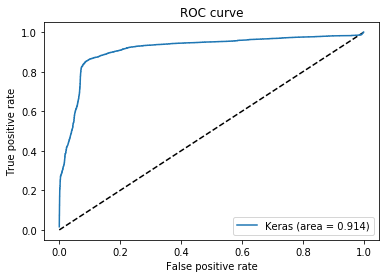

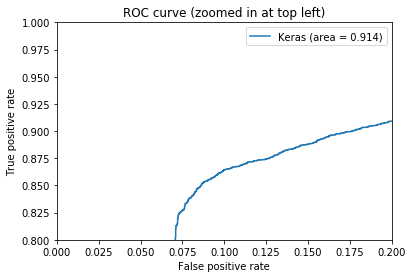

In [17]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()